In [ ]:
!conda install -y numpy

In [1]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [2]:
X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [3]:
X.shape

(50, 2)

In [4]:
X[0:3]

array([[-0.15856989,  0.98480618],
       [ 1.10900374, -0.62160223],
       [ 0.39641523,  0.20740869]])

In [5]:
y.shape

(50,)

In [6]:
y

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1])

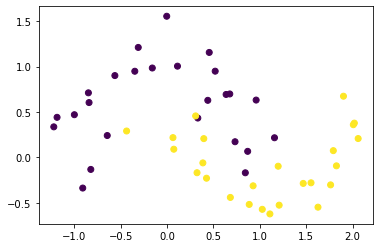

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
#select x coordinate value with X[:,0]
#select y coordinate value with X[:,1]

In [8]:
X.shape

(50, 2)

add bias with hstack. vector of 1 (makes shape 50, 3)

In [9]:
X = np.hstack([X, np.ones((X.shape[0], 1))])
X.shape

(50, 3)

In [10]:
# weights
#first layer
w1 = np.random.random(size=(3,2))
#output layer
w2 = np.random.random(size=(3,1))

weights = [w1,w2]

In [11]:
weights

[array([[0.56345924, 0.28325315],
        [0.46807649, 0.2551566 ],
        [0.25769573, 0.45635211]]),
 array([[0.43812909],
        [0.23269659],
        [0.43723406]])]

In [12]:
step1 = np.dot(X, weights[0])
step1.shape

(50, 2)

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
step2 = sigmoid(step1) #acitvation function applied, step2 is first output
step2.shape

(50, 2)

In [15]:
step3 = np.hstack([step2, np.ones((step2.shape[0], 1))]) #add bias neuron
step3.shape

(50, 3)

In [16]:
#dot product neurons with second weight matrix
step4 = np.dot(step3, weights[1])
step4.shape

(50, 1)

In [17]:
step3.shape, weights[1].shape, step4.shape

((50, 3), (3, 1), (50, 1))

In [18]:
step5 = sigmoid(step4) #activationi function applied a seconde time, step5 is the second output
step5.shape

(50, 1)

In [19]:
ypred = step5

In [20]:
def feed_forward(X, weights):

    ''' STEP 1. calculate the dot product of X
    (shape of (50,3))
    and the weights of the first layer
    (shape of (3, 2))
    this results in an output shape of (50, 2)'''
    step1 = np.dot(X, weights[0])


    ''' STEP 2. apply the sigmoid function on the result
    (applying the sigmoid function on a 50x2 matrix outputs the same shape.
    '''
    step2 = sigmoid(step1)


    ''' STEP 3. append an extra 1 for the bias to the result
    (this results in a 50x3 matrix)'''
    step3 = np.hstack([step2, np.ones((step2.shape[0], 1))])


    ''' STEP 4. calculate the dot product of X (from step 3)
    (shape of (50, 3))
    and the weights of the second layer
    (shape of (3, 1)). This results in an output shape of (50, 1)'''
    step4 = np.dot(step3, weights[1])


    ''' STEP 5. apply the sigmoid function on the result'''
    step5 = sigmoid(step4)
    return step2, step5

In [21]:
ypred.shape

(50, 1)

In [22]:
ypred[0:5]

array([[0.70611508],
       [0.70477621],
       [0.70460069],
       [0.72133255],
       [0.69165912]])

In [23]:
out1, out2 = feed_forward(X, [w1, w2])
assert out1.shape == (50, 2)
assert out2.shape == (50, 1)

In [24]:
out1.shape

(50, 2)

In [25]:
out2.shape

(50, 1)

In [26]:
w1.shape

(3, 2)

In [27]:
w2.shape

(3, 1)

Xref = np.array([[1.0, 2.0, 1.0]])
whidden = np.array([[1.0, 2.0, 0.0],
                 [-1.0, -2.0, 0.0]
                    ]).T
wout = np.array([[1.0, -1.0, 0.5]]).T

out1, out2 = feed_forward(Xref, [whidden, wout])
assert np.all(out1.round(2) == np.array([[0.99, 0.01]]))
assert np.all(out2.round(2) == np.array([[0.82]]))

Test from chapter 9.1 of course material successful1!

### Step 1: Debugging Check

### Step 2:  Write a Loss Function

In [28]:
ytrue = y
np.log(ytrue)

/Users/anja.jesierski/opt/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


array([-inf,   0.,   0.,   0., -inf,   0.,   0.,   0.,   0., -inf, -inf,
       -inf,   0., -inf, -inf, -inf,   0.,   0.,   0., -inf, -inf, -inf,
       -inf,   0.,   0., -inf,   0.,   0.,   0., -inf,   0., -inf,   0.,
       -inf, -inf, -inf,   0.,   0., -inf,   0., -inf, -inf, -inf,   0.,
       -inf, -inf,   0., -inf,   0.,   0.])

In [29]:
def log_loss(ytrue, ypred):
    loss = - ((ytrue * np.log(ypred)) + ((1-ytrue) * np.log(1-ypred))) #transcribe the formula above
    return loss

Test if this makes sense

ytrue_test = np.array([0.0, 0.0, 1.0, 1.0])
ypred_test = np.array([0.01, 0.99, 0.01, 0.99])
expected = np.array([0.01, 4.61, 4.61, 0.01])
assert np.all(log_loss(ytrue_test, ypred_test).round(2) == expected)

expected.shape

### Step 3: Get Initial Loss

In [30]:
out1.shape

(50, 2)

In [31]:
out2.shape

(50, 1)

In [32]:
y.shape, y

((50,),
 array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1]))

In [33]:
ytrue = y.reshape(-1, 1) # reshape the ytrue values from a (N, ) array to a (N, 1) array
ytrue.shape, ytrue[0:5]

((50, 1),
 array([[0],
        [1],
        [1],
        [1],
        [0]]))

In [34]:
out1, out2 = feed_forward(X, weights) # weights = [w1,w2], out1, out2 have been calculated before
log_loss(ytrue,ypred).shape,out1.shape#which arrays do we need to compare? --> ytrue and ypred 

((50, 1), (50, 2))

### Step 4: Write a Backpropagation Function

In this lesson, we will discuss the equations for (a simple version of) the backpropagation algorithm using gradient descent. But they are also printed here, for your reference:

Please pay close attention to what is a dot-product (⋅), regular multiplication (×), delta (Δ), and a gradient (∇)!

(A) 𝑒𝑟𝑟𝑜𝑟=(𝑦̂ −𝑦𝑡𝑟𝑢𝑒)×𝑙𝑜𝑠𝑠

(B) ∇𝑦=𝑎𝑐𝑡′(𝐻𝑜⋅𝜔𝑜)×𝑒𝑟𝑟𝑜𝑟

(C) Δ𝜔𝑜=−(∇𝑦⋅𝐻𝑜)×𝐿𝑅

(D) ∇𝐻=𝑎𝑐𝑡′(𝑋⋅𝜔ℎ)×(∇𝑦⋅𝜔𝑜)

(E) Δ𝜔ℎ=−(∇𝐻⋅𝑋)×𝐿𝑅

In [35]:
def backprop(weights,
             output1, #hidden layer
             output2,
             ytrue,
             X_input,
             LR):

    wH = weights[0]
    wO = weights[1]

    '''EQUATION A:'''
    error = (output2-ytrue) * log_loss(ytrue,output2) # y^ = ypred?

    '''EQUATION B:'''
    hidden_out_with_bias = np.hstack([output1, np.ones((output1.shape[0], 1))])
    #don't forget the bias!
    sig_deriv = sigmoid(np.dot(hidden_out_with_bias, wO))* (1 - sigmoid(np.dot(hidden_out_with_bias, wO)))
    #derivative of the sigmoid function with respect to the
    #hidden output * weights
    y_grad = sig_deriv * error

    '''EQUATION C:'''
    delta_wo = -np.dot(y_grad.T, hidden_out_with_bias ) * LR
    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wo.T

    '''EQUATION D:'''
    sig_deriv_2 = sigmoid(np.dot(X_input,wH)) * (1 - sigmoid(np.dot(X_input,wH)))
    H_grad = sig_deriv_2 * np.dot(y_grad, wO[:-1].T)
    #exclude the bias (last column) of the outer weights,
    #since it is not backpropagated!

    '''EQUATION E:'''
    delta_wH = -np.dot(H_grad.T, X_input) * LR
    wH_new = wH + delta_wH.T
    #old weights + delta weights -> new weights!

    # new hidden weights, new output weights
    return wH_new, wO_new

In [36]:
error = (out2-ytrue) * log_loss(ytrue,out2)
H_ob = np.hstack([out1, np.ones((out1.shape[0], 1))])
sig_deriv = sigmoid(np.matmul(H_ob, w2))* (1 - sigmoid(np.matmul(H_ob, w2)))
y_grad = sig_deriv * error
delta_wo = -np.dot(y_grad.T, H_ob) * 1
error.shape, H_ob.shape, w2.shape, np.dot(H_ob,w2).shape, sig_deriv.shape, y_grad.shape, delta_wo.shape

((50, 1), (50, 3), (3, 1), (50, 1), (50, 1), (50, 1), (1, 3))

In [37]:
np.hstack([out2, np.ones((out2.shape[0], 1))])[:5]

array([[0.70611508, 1.        ],
       [0.70477621, 1.        ],
       [0.70460069, 1.        ],
       [0.72133255, 1.        ],
       [0.69165912, 1.        ]])

### Step 5: Run the Backpropagation Algorithm

In [82]:
def add_bias(matr_arr):
    bias_added = np.hstack([matr_arr, np.ones((matr_arr.shape[0], 1))])
    return bias_added

In [83]:
# setup
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
X = add_bias(X)
y = y.reshape(-1, 1)
weights = [
   np.random.normal(size=(3, 2)),
   np.random.normal(size=(3, 1))
]

# train
LOSS_VEC = []

for i in range(1000):
    output1, output2 = feed_forward(X, weights)
    LOSS_VEC.append(log_loss(y, output2).sum())
    new_weights = backprop(weights, output1, output2, y, X, 0.1) #backprop's last attribute = LR
    weights = new_weights

### Step 6: Plot Results

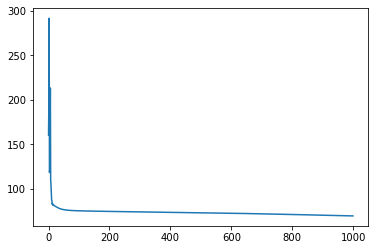

In [84]:
plt.plot(range(1000), LOSS_VEC) #LR = 0.1